# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [483]:
clustering_df = pd.read_csv('clustering.csv')
clustering_df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Potential_Fraud,Cluster
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,False,0
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,False,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,False,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,False,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,False,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

Normalisasi

In [484]:
min_max_scaler =  MinMaxScaler()

numerical_columns = clustering_df.select_dtypes(include=['float64', 'int64']).columns
clustering_df[numerical_columns] = min_max_scaler.fit_transform(clustering_df[numerical_columns])

clustering_df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Potential_Fraud,Cluster
0,0.007207,0.838710,0.244828,0.0,0.336832,Debit,San Diego,ATM,Doctor,False,0.0
1,0.195940,0.806452,0.451724,0.0,0.918055,Debit,Houston,ATM,Doctor,False,0.0
2,0.065680,0.016129,0.158621,0.0,0.068637,Debit,Mesa,Online,Student,False,0.5
3,0.096016,0.129032,0.051724,0.0,0.569198,Debit,Raleigh,Online,Student,False,0.5
4,0.006874,0.129032,0.648276,0.0,0.492591,Credit,Atlanta,Online,Student,False,0.5


Encoding

In [485]:
label_encoder = LabelEncoder()

categorical_columns = clustering_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    clustering_df[col] = label_encoder.fit_transform(clustering_df[col])

clustering_df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Potential_Fraud,Cluster
0,0.007207,0.838710,0.244828,0.0,0.336832,1,36,0,0,False,0.0
1,0.195940,0.806452,0.451724,0.0,0.918055,1,15,0,0,False,0.0
2,0.065680,0.016129,0.158621,0.0,0.068637,1,23,2,3,False,0.5
3,0.096016,0.129032,0.051724,0.0,0.569198,1,33,2,3,False,0.5
4,0.006874,0.129032,0.648276,0.0,0.492591,0,1,2,3,False,0.5


In [486]:
X = clustering_df.drop('Potential_Fraud', axis=1)
y = clustering_df['Potential_Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data: ",len(X))
print("Jumlah data latih: ",len(X_train))

Jumlah data:  2512
Jumlah data latih:  2009


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Membuat Model Decision Tree

In [487]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Membuat Model KNN

In [488]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Penjelasan Algoritma: Decision Tree dan K-Nearest Neighbors (KNN)

## 1. Decision Tree
Decision Tree adalah algoritma yang membagi data berdasarkan fitur untuk membuat keputusan. Setiap cabang pohon mewakili keputusan, dan daun pohon mewakili hasil klasifikasi.

### Kelebihan:
- Mudah dipahami dan diinterpretasikan.
- Tidak memerlukan normalisasi data.

### Kekurangan:
- Rentan terhadap overfitting.

---

## 2. K-Nearest Neighbors (KNN)
KNN mengklasifikasikan data berdasarkan kedekatannya dengan **k tetangga terdekat**. Setiap data baru diklasifikasikan berdasarkan mayoritas kelas dari tetangga terdekatnya.

### Kelebihan:
- Mudah dipahami.
- Tidak memerlukan pelatihan eksplisit.

### Kekurangan:
- Lambat pada dataset besar.
- Terpengaruh oleh dimensi data yang tinggi.

---

## Perbandingan:
| Aspek                  | Decision Tree            | KNN                       |
|------------------------|--------------------------|---------------------------|
| **Kecepatan Pelatihan**| Cepat                    | Lambat pada dataset besar |
| **Kebutuhan Memori**   | Lebih rendah             | Lebih tinggi              |
| **Overfitting**        | Rentan                   | Terpengaruh oleh nilai k  |


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

##### Decision Tree

Prediksi Decision Tree

In [489]:
dt_pred = dt_model.predict(X_test)

Evaluasi Model Decision Tree

In [490]:
print("Decision Tree - Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree - F1-Score:", f1_score(y_test, dt_pred))
print("Decision Tree - Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree - Accuracy: 0.9980119284294234
Decision Tree - F1-Score: 0.9777777777777777
Decision Tree - Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       480
        True       1.00      0.96      0.98        23

    accuracy                           1.00       503
   macro avg       1.00      0.98      0.99       503
weighted avg       1.00      1.00      1.00       503



Confusion Matrik Decision Tree

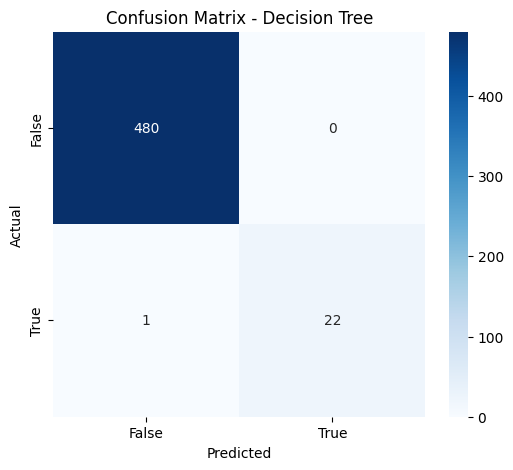

In [491]:
dt_cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

plt.show()

##### KNN

Prediksi KNN

In [492]:
knn_pred = knn_model.predict(X_test)

Evaluasi Model KNN

In [493]:
print("KNN - Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN - F1-Score:", f1_score(y_test, knn_pred))
print("KNN - Classification Report:")
print(classification_report(y_test, knn_pred))

KNN - Accuracy: 0.9821073558648111
KNN - F1-Score: 0.8
KNN - Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       480
        True       0.82      0.78      0.80        23

    accuracy                           0.98       503
   macro avg       0.90      0.89      0.90       503
weighted avg       0.98      0.98      0.98       503



Confusion Matrik KNN

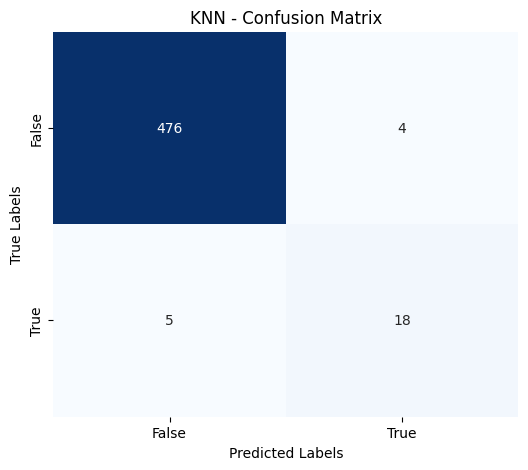

In [494]:
knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN - Confusion Matrix")

plt.show()

In [495]:
dt_report = classification_report(y_test, dt_pred, digits=5, output_dict=True)
knn_report = classification_report(y_test, knn_pred, digits=5, output_dict=True)

array = {
    'Model': ['Decision Tree', 'KNN'],
    'Accuracy': [dt_report['accuracy'], knn_report['accuracy']],
    'Precision': [dt_report['macro avg']['precision'], knn_report['macro avg']['precision']],
    'Recall': [dt_report['macro avg']['recall'], knn_report['macro avg']['recall']],
    'F1-Score': [dt_report['macro avg']['f1-score'], knn_report['macro avg']['f1-score']]
}

df = pd.DataFrame(array)
df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.998012,0.998960,0.978261,0.988369
1,KNN,0.982107,0.903893,0.887138,0.895317


# Hasil Evaluasi Model Klasifikasi

Pada evaluasi model klasifikasi, dua algoritma yang digunakan adalah **Decision Tree** dan **K-Nearest Neighbors (KNN)**.

## **Decision Tree**
- **Accuracy**: 99.80%
- **F1-Score**: 0.978
- **Precision**: 1.00 (False), 1.00 (True)
- **Recall**: 1.00 (False), 0.96 (True)
- **Confusion Matrix**: [[480, 0], [1, 22]]

---

## **K-Nearest Neighbors (KNN)**
- **Accuracy**: 98.21%
- **F1-Score**: 0.80
- **Precision**: 0.99 (False), 0.82 (True)
- **Recall**: 0.99 (False), 0.78 (True)
- **Confusion Matrix**: [[476, 4], [5, 18]]

---

## **Perbandingan Hasil Evaluasi**
| Metric         | Decision Tree       | KNN               |
|----------------|---------------------|-------------------|
| **Accuracy**   | 99.80%              | 98.21%            |
| **F1-Score**   | 0.978               | 0.80              |
| **Precision**  | 1.00 (False), 1.00 (True) | 0.99 (False), 0.82 (True) |
| **Recall**     | 1.00 (False), 0.96 (True) | 0.99 (False), 0.78 (True) |

### Kesimpulan:
- **Decision Tree** lebih unggul dalam akurasi dan performa klasifikasi dibandingkan dengan **KNN**.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Decision Tree

Tuning menggunakan GridSearchCV 

In [496]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


### KNN

Tuning menggunakan GridSearchCV 

In [497]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)

Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Mendapatkan  dan prediksi model terbaik dari GridSearchCV

### Decision Tree

Decision tree predict

In [498]:
best_dt_model = grid_search.best_estimator_
best_dt_pred = best_dt_model.predict(X_test)

Evaluasi Model

In [499]:
print("Decision Tree (Tuned) - Accuracy:", accuracy_score(y_test, best_dt_pred))
print("Decision Tree (Tuned) - F1-Score:", f1_score(y_test, best_dt_pred))
print("Decision Tree (Tuned) - Classification Report:")
print(classification_report(y_test, best_dt_pred))

Decision Tree (Tuned) - Accuracy: 0.9980119284294234
Decision Tree (Tuned) - F1-Score: 0.9777777777777777
Decision Tree (Tuned) - Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       480
        True       1.00      0.96      0.98        23

    accuracy                           1.00       503
   macro avg       1.00      0.98      0.99       503
weighted avg       1.00      1.00      1.00       503



Confusion Matrix Decision Tree (Tuned)

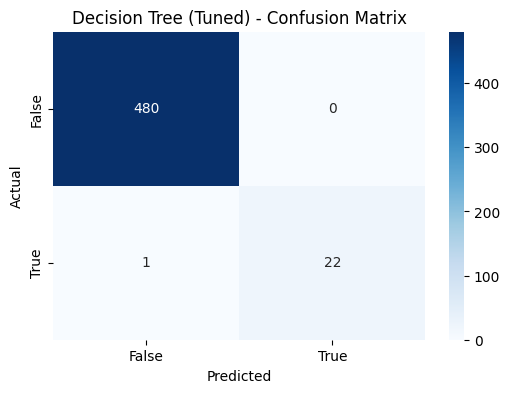

In [500]:
cm_lr = confusion_matrix(y_test, best_dt_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Decision Tree (Tuned) - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

KNN Predict

In [501]:
knn_pred = grid_search_knn.predict(X_test)

Evaluasi Model

In [502]:
print("KNN (Tuned) - Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN (Tuned) - F1-Score:", f1_score(y_test, knn_pred))
print("KNN (Tuned) - Classification Report:")
print(classification_report(y_test, knn_pred))

KNN (Tuned) - Accuracy: 0.9960238568588469
KNN (Tuned) - F1-Score: 0.9565217391304348
KNN (Tuned) - Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       480
        True       0.96      0.96      0.96        23

    accuracy                           1.00       503
   macro avg       0.98      0.98      0.98       503
weighted avg       1.00      1.00      1.00       503



Confusion Matrix KNN (Tuned)

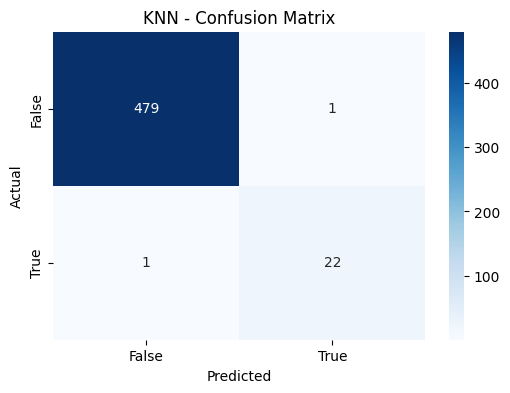

In [503]:
cm_knn = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("KNN - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [504]:
dt_best_report = classification_report(y_test, best_dt_pred, digits=5, output_dict=True)
knn_best_report = classification_report(y_test, knn_pred, digits=5, output_dict=True)

array = {
    'Model': ['Decision Tree (Tuned)', 'KNN (Tuned)'],
    'Accuracy': [dt_best_report['accuracy'], knn_best_report['accuracy']],
    'Precision': [dt_best_report['macro avg']['precision'], knn_best_report['macro avg']['precision']],
    'Recall': [dt_best_report['macro avg']['recall'], knn_best_report['macro avg']['recall']],
    'F1-Score': [dt_best_report['macro avg']['f1-score'], knn_best_report['macro avg']['f1-score']]
}

df_tuned = pd.DataFrame(array)
df_tuned

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (Tuned),0.998012,0.998960,0.978261,0.988369
1,KNN (Tuned),0.996024,0.977219,0.977219,0.977219


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [505]:
df_merge = pd.concat([df, df_tuned], axis=0)
df_merge.iloc[[1, 2]] = df_merge.iloc[[2, 1]].values
df_merge

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.998012,0.998960,0.978261,0.988369
1,Decision Tree (Tuned),0.998012,0.998960,0.978261,0.988369
0,KNN,0.982107,0.903893,0.887138,0.895317
1,KNN (Tuned),0.996024,0.977219,0.977219,0.977219


### 1. Bandingkan Hasil Evaluasi Sebelum dan Setelah Tuning

Pada model Decision Tree, tidak ada perubahan  antara hasil sebelum dan setelah tuning. Sebelum tuning, model ini  memiliki performa yang  baik dengan akurasi 99.80%, precision 99.89%, recall 97.83%, dan F1-score 98.84%. Begitu juga setelah tuning, hasilnya tetap sama. Model ini bisa saja terindikasi overfitting.

Sementara itu, pada model KNN, ada peningkatan setelah tuning. Sebelum tuning, KNN hanya mencapai akurasi 98.21%, dengan precision 90.39%, recall 88.71%, dan F1-score 89.53%. Namun, setelah dilakukan tuning, model ini mengalami peningkatan luar biasa dengan akurasi mencapai 99.60%, precision dan recall masing-masing 97.72%, serta F1-score yang juga 97.72%. Hal ini menunjukkan bahwa tuning berhasil meningkatkan kemampuan model KNN secara keseluruhan.

### 2. Identifikasi Kelemahan Model
- **Decision Tree**:
  - **Recall** sedikit lebih rendah (97.83%), menunjukkan model mungkin kesulitan dalam mendeteksi beberapa kelas, meskipun **Precision** sangat tinggi.
  - **Overfitting** mudah terjadi pada model **Decision Tree** terutama jika data yang digunakan terbatas.

- **KNN**:
  - Sensitif terhadap parameter k. Nilai k yang tidak tepat bisa menyebabkan model mengalami overfitting atau underfitting.

### 3. Rekomendasi Tindakan Lanjutan
- **Mengumpulkan Data Tambahan**:
  - Jika **Decision Tree** masih menunjukkan **false negatives** pada kelas tertentu, pertimbangkan untuk mengumpulkan lebih banyak data yang mewakili kelas-kelas tersebut agar model dapat belajar lebih baik dan meningkatkan recall.
  - Jika model mengalami overfitting pertimbangkan untuk mengurangi kompleksitas model dengan mengatur hyperparameter seperti max_depth, min_samples_split, atau min_samples_leaf pada Decision Tree.

- **Mencoba Algoritma Lain**:
  - **Decision Tree**: Meskipun performanya terlihat baik, coba gunakan model yang lain untuk hasil yang lebih optimal, terutama jika ada banyak fitur yang saling berinteraksi dan data yang kecil.